### data loading

In [29]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data = pd.read_excel(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\1. data_gathering\spam.xlsx')
print('data loading')
data.head(5)

data loading


v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

### health of datasize

In [30]:
print(f"no of records we have for training is {data.shape[0]} \nand no of cols in comparison to no_of_records are:{data.shape[1]}")

no of records we have for training is 5572 
and no of cols in comparison to no_of_records are:5


### basic data grooming

In [31]:
# dropping unseless cols
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.head(5)

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [32]:
# renaming cols to proper names
data.rename(columns={'v1': 'target', 'v2':'text_msg'}, inplace=True)
data.head()

target                                           text_msg
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

### missing values in data

In [33]:
data.isnull().sum()

target      0
text_msg    0
dtype: int64

### duplicate record problem in data

In [34]:
data.duplicated().sum()

403

In [35]:
data = data.drop_duplicates(keep='first')

In [36]:
data.duplicated().sum()

0

In [37]:
data.shape

(5169, 2)

### imbalanced problem in data

In [42]:
data['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

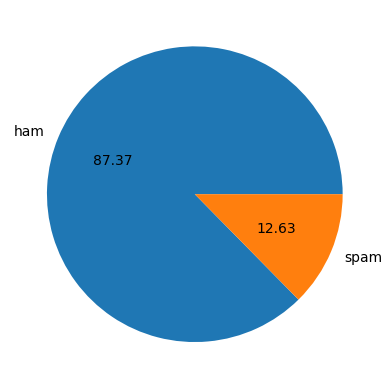

data is imbalanced


In [47]:
import matplotlib.pyplot as plt 
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()
print('data is imbalanced')

### fixing dtypes of cols

In [48]:
data.head()

target                                           text_msg
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    5169 non-null   object
 1   text_msg  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [51]:
data['text_msg'] = data['text_msg'].astype(str)

### saving data

In [52]:
data.to_csv(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\2. eda_n_dataCleaning\3. cleaned_data.csv', index=False)